# Dataset A – Adult Income
## Exploratory Data Analysis (EDA)

We want to understand the structure, target distribution, and key properties of the Adult Income dataset in order to formulate hypothesis-driven expectations about algorithmic performance.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

SEED=49
np.random.seed(SEED)
random.seed(SEED)

### Data Loading

We load the Adult Income dataset and inspect its basic structure.

In [3]:
DATA_PATH = "../adult.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


If we look closely, `education` and `education-num` are redundant because they contain the same information, expressed in two different ways. For the purposes of creating the model, it would be best to omit one of them.

The feature `fnlwgt` represents a census sampling weight rather than an individual-level attribute. Since our goal is predictive modeling at the individual level, this variable does not carry meaningful explanatory information and is excluded from the feature set.

### Dataset Overview

We examine dataset size, feature types, and missing values.

In [4]:
df.shape

(45222, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education-num   45222 non-null  float64
 5   marital-status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital-gain    45222 non-null  float64
 11  capital-loss    45222 non-null  float64
 12  hours-per-week  45222 non-null  float64
 13  native-country  45222 non-null  object 
 14  class           45222 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.2+ MB


In [6]:
df.isna().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### Target Variable Distribution

We analyze class balance to motivate metric selection.

In [7]:
target_col = "class"
df[target_col].value_counts()

<=50K    34014
>50K     11208
Name: class, dtype: int64

In [8]:
df[target_col].value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: class, dtype: float64

### Attributes Distribution

We analyze them to see if they can really add value to the analysis

In [9]:
df[["age", "hours-per-week", "capital-gain", "capital-loss"]].describe()

,age,hours-per-week,capital-gain,capital-loss
count,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,40.938017,1101.430344,88.595418
std,13.217870,12.007508,7506.430084,404.956092
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,40.000000,0.000000,0.000000
50%,37.000000,40.000000,0.000000,0.000000
75%,47.000000,45.000000,0.000000,0.000000
max,90.000000,99.000000,99999.000000,4356.000000


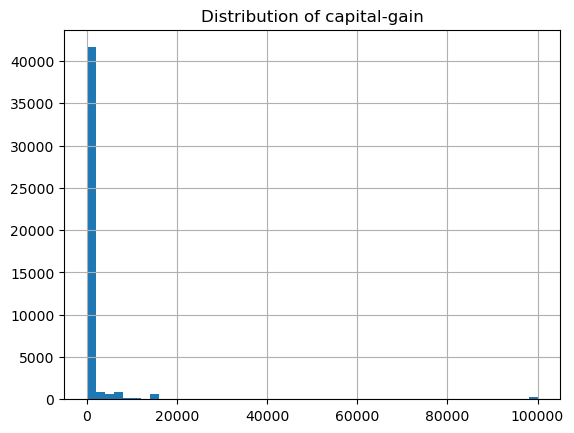

In [10]:
df["capital-gain"].hist(bins=50)
plt.title("Distribution of capital-gain")
plt.show()

In [11]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove("class")

categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [12]:
def categorical_target_summary(df, col, target="class"):
    return (
        pd.crosstab(df[col], df[target], normalize="index")
        .sort_values(">50K", ascending=False)
    )

for col in categorical_cols:
    print(f"\n=== {col.upper()} ===")
    display(categorical_target_summary(df, col))



=== WORKCLASS ===


class,<=50K,>50K
workclass,,
Self-emp-inc,0.445930,0.554070
Federal-gov,0.609531,0.390469
Local-gov,0.704839,0.295161
Self-emp-not-inc,0.721022,0.278978
State-gov,0.732785,0.267215
Private,0.782298,0.217702
Without-pay,0.904762,0.095238



=== EDUCATION ===


class,<=50K,>50K
education,,
Prof-school,0.245860,0.754140
Doctorate,0.266544,0.733456
Masters,0.445903,0.554097
Bachelors,0.580185,0.419815
Assoc-acdm,0.735899,0.264101
Assoc-voc,0.742726,0.257274
Some-college,0.798970,0.201030
HS-grad,0.836569,0.163431
12th,0.925477,0.074523



=== MARITAL-STATUS ===


class,<=50K,>50K
marital-status,,
Married-civ-spouse,0.545761,0.454239
Married-AF-spouse,0.562500,0.437500
Divorced,0.895982,0.104018
Married-spouse-absent,0.902174,0.097826
Widowed,0.905247,0.094753
Separated,0.929837,0.070163
Never-married,0.951980,0.048020



=== OCCUPATION ===


class,<=50K,>50K
occupation,,
Exec-managerial,0.520889,0.479111
Prof-specialty,0.549933,0.450067
Protective-serv,0.685451,0.314549
Tech-support,0.710563,0.289437
Armed-Forces,0.714286,0.285714
Sales,0.730954,0.269046
Craft-repair,0.774917,0.225083
Transport-moving,0.793610,0.206390
Adm-clerical,0.863538,0.136462



=== RELATIONSHIP ===


class,<=50K,>50K
relationship,,
Wife,0.514108,0.485892
Husband,0.544252,0.455748
Not-in-family,0.895061,0.104939
Unmarried,0.936926,0.063074
Other-relative,0.962936,0.037064
Own-child,0.984153,0.015847



=== RACE ===


class,<=50K,>50K
race,,
Asian-Pac-Islander,0.716807,0.283193
White,0.737629,0.262371
Other,0.872521,0.127479
Black,0.873699,0.126301
Amer-Indian-Eskimo,0.878161,0.121839



=== SEX ===


class,<=50K,>50K
sex,,
Male,0.687523,0.312477
Female,0.886424,0.113576



=== NATIVE-COUNTRY ===


class,<=50K,>50K
native-country,,
Taiwan,0.545455,0.454545
France,0.555556,0.444444
India,0.578231,0.421769
England,0.605042,0.394958
Iran,0.607143,0.392857
Canada,0.631902,0.368098
Greece,0.632653,0.367347
Japan,0.651685,0.348315
Yugoslavia,0.652174,0.347826


### Initial Observations

- The dataset contains 45222 observations and shows no missing values across features.
- The target variable is clearly imbalanced, with approximately a 3:1 ratio between the ≤50K and >50K classes (34014 vs. 11208 observations).
- This level of imbalance suggests that accuracy alone may be misleading; therefore, F1-score and precision/recall based metrics are more appropriate for evaluation.
- The feature set is heterogeneous, combining continuous variables (such as age, hours-per-week, capital-gain/loss) with multiple categorical variables (such as education, occupation, marital-status).
- Several categorical features appear to have high cardinality, which may increase effective dimensionality after encoding and impact distance-based methods.
- Some continuous variables (notably capital-gain and capital-loss) appear to be highly skewed, with many zero values and a small number of large non-zero entries.


### Preliminary Hypothesis

Based on the observed sparsity, high dimensionality, and class imbalance, we hypothesize that:

- Linear models (e.g., linear SVM) will perform competitively due to margin maximization in sparse spaces.
- kNN performance may degrade due to the curse of dimensionality.
- Tree-based models may overfit without strong regularization.

## Experiments


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

X = df.drop(columns=["class", "fnlwgt", "education"])
y = df["class"]

num_cols = ["age", "hours-per-week", "capital-gain", "capital-loss", 'education-num']
cat_cols = ['workclass','marital-status','occupation','relationship','race','sex','native-country']

preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

preprocessor_knn = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_cols),
    ],
    remainder="drop"
)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score
import pandas as pd

# Pipeline
dt_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=SEED))
])

# Complexity curve: depth
param_grid = {
    "clf__max_depth": [2, 4, 6, 8, 12, 16, None]
}

f1_pos = make_scorer(f1_score, pos_label=">50K")

dt_grid = GridSearchCV(
    dt_pipe,
    param_grid,
    scoring=f1_pos,
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_

y_pred = dt_best.predict(X_test)

print("Best max_depth:", dt_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 (>50K):", f1_score(y_test, y_pred, pos_label=">50K"))


Best max_depth: {'clf__max_depth': 12}
Test Accuracy: 0.8543946932006633
Test F1 (>50K): 0.6664978475563433


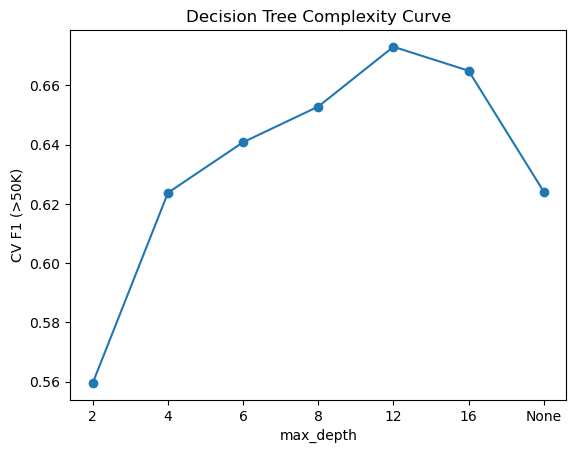

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

dt_results = pd.DataFrame(dt_grid.cv_results_)

plt.figure()
plt.plot(
    dt_results["param_clf__max_depth"].astype(str),
    dt_results["mean_test_score"],
    marker="o"
)
plt.xlabel("max_depth")
plt.ylabel("CV F1 (>50K)")
plt.title("Decision Tree Complexity Curve")
plt.show()


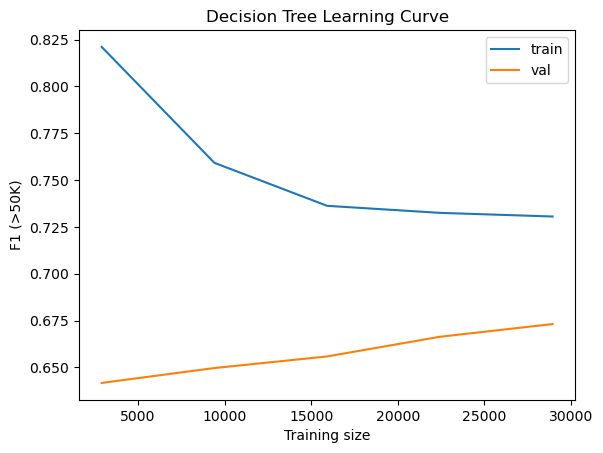

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    dt_best,
    X_train,
    y_train,
    cv=5,
    scoring=f1_pos,
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label="train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="val")
plt.xlabel("Training size")
plt.ylabel("F1 (>50K)")
plt.legend()
plt.title("Decision Tree Learning Curve")
plt.show()

### k-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ("prep", preprocessor_knn),
    ("clf", KNeighborsClassifier())
])

param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11, 13, 15, 25, 50]
}

f1_pos = make_scorer(f1_score, pos_label=">50K")

knn_grid = GridSearchCV(
    knn_pipe,
    param_grid,
    scoring=f1_pos,
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

knn_best = knn_grid.best_estimator_

y_pred_knn = knn_best.predict(X_test)

print("Best k:", knn_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Test F1 (>50K):", f1_score(y_test, y_pred_knn, pos_label=">50K"))


Best k: {'clf__n_neighbors': 11}
Test Accuracy: 0.8313985627418463
Test F1 (>50K): 0.6308399903171145


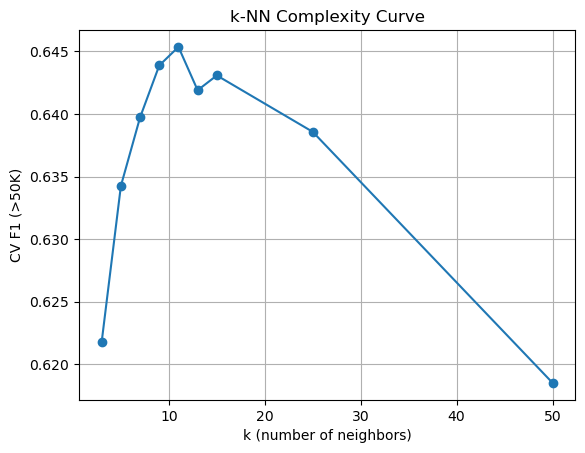

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

knn_results = pd.DataFrame(knn_grid.cv_results_)

plt.figure()
plt.plot(
    knn_results["param_clf__n_neighbors"].astype(int),
    knn_results["mean_test_score"],
    marker="o"
)
plt.xlabel("k (number of neighbors)")
plt.ylabel("CV F1 (>50K)")
plt.title("k-NN Complexity Curve")
plt.grid(True)
plt.show()



### SVM - Linear

In [20]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score


svm_lin_pipe = Pipeline([
    ("prep", preprocessor), 
    ("clf", LinearSVC(random_state=SEED, max_iter=10000))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10]
}

f1_pos = make_scorer(f1_score, pos_label=">50K")

svm_lin_grid = GridSearchCV(
    svm_lin_pipe,
    param_grid,
    scoring=f1_pos,
    cv=5,         
    n_jobs=-1
)

svm_lin_grid.fit(X_train, y_train)

svm_lin_best = svm_lin_grid.best_estimator_
y_pred_lin = svm_lin_best.predict(X_test)

print("Best params (Linear):", svm_lin_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Test F1 (>50K):", f1_score(y_test, y_pred_lin, pos_label=">50K"))


/Users/juancarloshenriquez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/juancarloshenriquez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/juancarloshenriquez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/juancarloshenriquez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/juancarloshenriquez/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best params (Linear): {'clf__C': 0.1}
Test Accuracy: 0.8468767274737424
Test F1 (>50K): 0.6581091088620094


### SVM - RBF

Kernelized SVMs with RBF kernels incur quadratic-to-cubic training complexity with respect to the number of training examples, which makes full cross-validation on the complete Adult dataset computationally prohibitive. To enable tractable hyperparameter tuning while preserving evaluation integrity, we perform model selection for the RBF kernel on a stratified subset (40%) of the training data only. All final evaluations are conducted on a shared held-out test set, ensuring fair comparison across models. 

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Stratified subsample ONLY of the training
SUBSAMPLE_FRAC = 0.4   # 40% del training

sss = StratifiedShuffleSplit(
    n_splits=1,
    test_size=1 - SUBSAMPLE_FRAC,
    random_state=SEED
)

idx_small, _ = next(sss.split(X_train, y_train))
X_train_small = X_train.iloc[idx_small]
y_train_small = y_train.iloc[idx_small]

print(f"Train full: {len(X_train)} | Train RBF subset: {len(X_train_small)}")

svm_rbf_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(kernel="rbf"))
])


param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.01, 0.1]
}


f1_pos = make_scorer(f1_score, pos_label=">50K")


svm_rbf_grid = GridSearchCV(
    svm_rbf_pipe,
    param_grid,
    scoring=f1_pos,
    cv=5,
    n_jobs=-1
)

svm_rbf_grid.fit(X_train_small, y_train_small)

svm_rbf_best = svm_rbf_grid.best_estimator_

y_pred_svm = svm_rbf_best.predict(X_test)

print("Best params (RBF):", svm_rbf_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Test F1 (>50K):", f1_score(y_test, y_pred_svm, pos_label=">50K"))


Train full: 36177 | Train RBF subset: 14470
Best params (RBF): {'clf__C': 1, 'clf__gamma': 0.1}
Test Accuracy: 0.8487562189054726
Test F1 (>50K): 0.6557624559637644


### Neural Network

#### sklearn MLPClassifier

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", MLPClassifier(
        solver="sgd",
        random_state=SEED,
        max_iter=200,
        early_stopping=True
    ))
])

param_grid = {
    "clf__hidden_layer_sizes": [(50,), (100,), (50,50)],
    "clf__alpha": [1e-4, 1e-3],
    "clf__learning_rate_init": [0.01, 0.1]
}

f1_pos = make_scorer(f1_score, pos_label=">50K")

mlp_grid = GridSearchCV(
    mlp_pipe,
    param_grid,
    scoring=f1_pos,
    cv=5,  
    n_jobs=-1
)

mlp_grid.fit(X_train, y_train)

mlp_best = mlp_grid.best_estimator_

y_pred_mlp = mlp_best.predict(X_test)

print("Best params (MLP):", mlp_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Test F1 (>50K):", f1_score(y_test, y_pred_mlp, pos_label=">50K"))

Best params (MLP): {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.1}
Test Accuracy: 0.8488667772249862
Test F1 (>50K): 0.6613822145157294


#### PyTorch + SVD

In [23]:
X_nn_sp = preprocessor.fit_transform(X_train)
X_test_sp = preprocessor.transform(X_test)

X_nn = X_nn_sp.toarray()
X_test_nn = X_test_sp.toarray()

y_nn = (y_train.values == ">50K").astype(int)
y_test_nn = (y_test.values == ">50K").astype(int)

print("NN input dim:", X_nn.shape)


NN input dim: (36177, 87)


In [24]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

import gc
gc.collect()

BATCH_SIZE = 64

train_ds = TensorDataset(
    torch.tensor(X_nn, dtype=torch.float32),
    torch.tensor(y_nn, dtype=torch.long)
)
test_ds = TensorDataset(
    torch.tensor(X_test_nn, dtype=torch.float32),
    torch.tensor(y_test_nn, dtype=torch.long)
)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)


class MLP(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.net(x)

model = MLP(X_nn.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-3)

for epoch in range(10):  
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()


2026-02-07 18:48:58.704830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.eval()
preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        preds.append(torch.argmax(model(xb), dim=1).numpy())

y_pred_nn = np.concatenate(preds)

print("\nPyTorch MLP (SVD) Results")
print("PyTorch NN Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print("PyTorch NN F1 (>50K):", f1_score(y_test_nn, y_pred_nn))



PyTorch MLP (SVD) Results
PyTorch NN Accuracy: 0.849640685461581
PyTorch NN F1 (>50K): 0.6740172579098753


In [27]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Neural Network (PyTorch + SVD)",
        "Decision Tree",
        "Neural Network (sklearn)",
        "SVM Linear",
        "SVM RBF",
        "kNN"
    ],
    "Accuracy": [
        0.849640685461581,
        0.8543946932006633,
        0.8488667772249862,
        0.8468767274737424,
        0.8487562189054726,
        0.8313985627418463
    ],
    "F1 (>50K)": [
        0.6740172579098753,
        0.6664978475563433,
        0.6613822145157294,
        0.6581091088620094,
        0.6557624559637644,
        0.6308399903171145
    ]
})

results_sorted = results.sort_values("F1 (>50K)", ascending=False)

results_sorted


,Model,Accuracy,F1 (>50K)
0,Neural Network (PyTorch + SVD),0.849641,0.674017
1,Decision Tree,0.854395,0.666498
2,Neural Network (sklearn),0.848867,0.661382
3,SVM Linear,0.846877,0.658109
4,SVM RBF,0.848756,0.655762
5,kNN,0.831399,0.630840
